In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks, welch

In [42]:
mitbih_train = pd.read_csv('./Practice1/dataset/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('./Practice1/dataset/mitbih_test.csv', header=None)

datasets = {
    "MIT-BIH Train": mitbih_train,
    "MIT-BIH Test": mitbih_test,
}


In [43]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.shape)  
    print(df.head()) 
    print(df.info()) 
    print("--" * 50)


Dataset: MIT-BIH Train
(87554, 188)
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0

In [44]:
for name, df in datasets.items():
    print(f"{name} missing values:\n{df.isnull().sum().sum()} values missing\n")


MIT-BIH Train missing values:
0 values missing

MIT-BIH Test missing values:
0 values missing



In [45]:
for name, df in datasets.items():
    print(f"{name} duplicates: {df.duplicated().sum()} duplicate rows")

MIT-BIH Train duplicates: 0 duplicate rows
MIT-BIH Test duplicates: 0 duplicate rows


C:\Users\tranl\AppData\Local\Temp\ipykernel_13400\2809747727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, -1], palette='coolwarm')


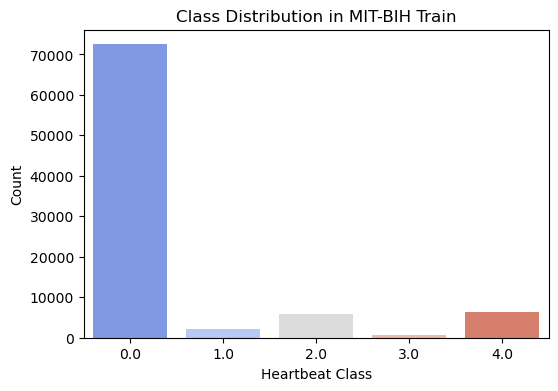

C:\Users\tranl\AppData\Local\Temp\ipykernel_13400\2809747727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, -1], palette='coolwarm')


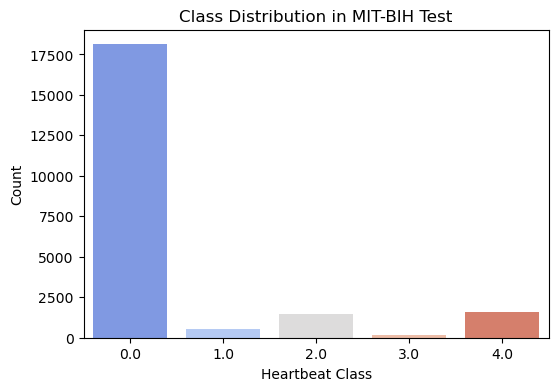

In [46]:
for name, df in datasets.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df.iloc[:, -1], palette='coolwarm')
    plt.title(f"Class Distribution in {name}")
    plt.xlabel("Heartbeat Class")
    plt.ylabel("Count")
    plt.show()


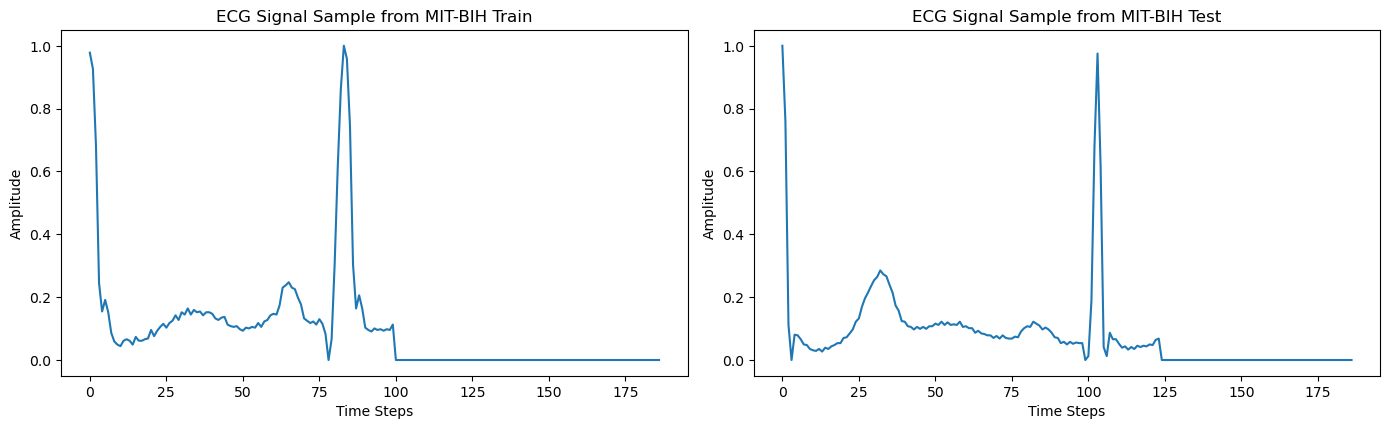

In [47]:
plt.figure(figsize=(14, 8))

for i, (name, df) in enumerate(datasets.items()):
    plt.subplot(2, 2, i + 1)
    plt.plot(df.iloc[0, :-1]) 
    plt.title(f"ECG Signal Sample from {name}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [48]:
for name, df in datasets.items():
    print(f"Statistical Summary of {name}:\n")
    print(df.describe().T)
    print("\n" + "--" * 50 + "\n")


Statistical Summary of MIT-BIH Train:

       count      mean       std  min       25%       50%       75%  max
0    87554.0  0.890360  0.240909  0.0  0.921922  0.991342  1.000000  1.0
1    87554.0  0.758160  0.221813  0.0  0.682486  0.826013  0.910506  1.0
2    87554.0  0.423972  0.227305  0.0  0.250969  0.429472  0.578767  1.0
3    87554.0  0.219104  0.206878  0.0  0.048458  0.166000  0.341727  1.0
4    87554.0  0.201127  0.177058  0.0  0.082329  0.147878  0.258993  1.0
..       ...       ...       ...  ...       ...       ...       ...  ...
183  87554.0  0.003471  0.036255  0.0  0.000000  0.000000  0.000000  1.0
184  87554.0  0.003221  0.034789  0.0  0.000000  0.000000  0.000000  1.0
185  87554.0  0.002945  0.032865  0.0  0.000000  0.000000  0.000000  1.0
186  87554.0  0.002807  0.031924  0.0  0.000000  0.000000  0.000000  1.0
187  87554.0  0.473376  1.143184  0.0  0.000000  0.000000  0.000000  4.0

[188 rows x 8 columns]

------------------------------------------------------------

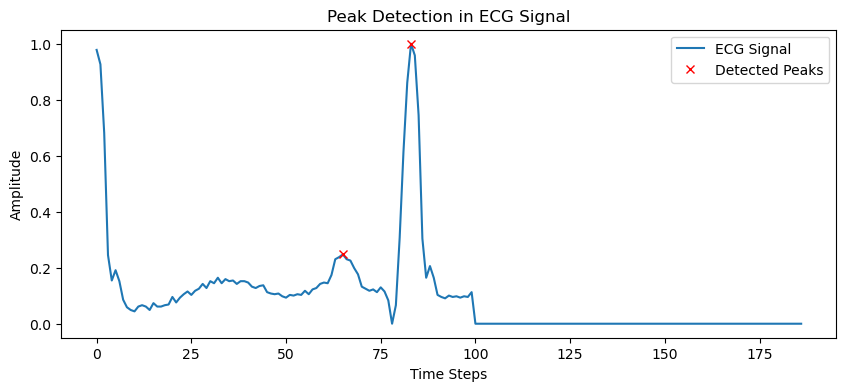

In [49]:
signal = mitbih_train.iloc[0, :-1].values
peaks, _ = find_peaks(signal, distance=10, prominence=0.2)

plt.figure(figsize=(10, 4))
plt.plot(signal, label="ECG Signal")
plt.plot(peaks, signal[peaks], "rx", label="Detected Peaks")
plt.title("Peak Detection in ECG Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


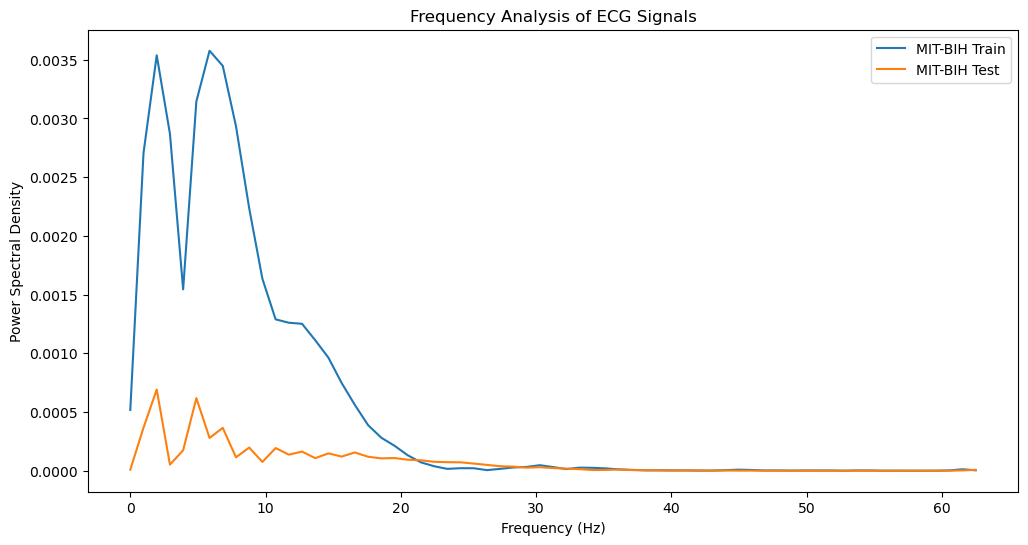

In [50]:
plt.figure(figsize=(12, 6))

for i, (name, df) in enumerate(datasets.items()):
    fs = 125
    f, Pxx = welch(df.iloc[0, :-1], fs=fs, nperseg=128)

    plt.plot(f, Pxx, label=name)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Frequency Analysis of ECG Signals")
plt.legend()
plt.show()


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
print(f"MIT-BIH Train Shape: {mitbih_train.shape}")
print(f"MIT-BIH Test Shape: {mitbih_test.shape}")

MIT-BIH Train Shape: (87554, 188)
MIT-BIH Test Shape: (21892, 188)


In [55]:
X_train, y_train = mitbih_train.iloc[:, :-1].values, mitbih_train.iloc[:, -1].values
X_test, y_test = mitbih_test.iloc[:, :-1].values, mitbih_test.iloc[:, -1].values

print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")


Training Data: (87554, 187), Labels: (87554,)
Testing Data: (21892, 187), Labels: (21892,)


In [56]:
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Final Training Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Final Testing Shape: {X_test.shape}, Labels Shape: {y_test.shape}")


Final Training Shape: (87554, 187, 1), Labels Shape: (87554, 5)
Final Testing Shape: (21892, 187, 1), Labels Shape: (21892, 5)


In [57]:
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    LSTM(64, return_sequences=True),
    LSTM(32),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


d:\anaconda\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 183, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 89, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 89, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 44, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,117 (352.02 KB)

 Trainable params: 89,733 (350.52 KB)

 Non-trainable params: 384 (1.50 KB)

In [58]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 92s 62ms/step - accuracy: 0.8738 - loss: 0.4773 - val_accuracy: 0.9554 - val_loss: 0.1670
Epoch 2/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.9607 - loss: 0.1520 - val_accuracy: 0.9632 - val_loss: 0.1329
Epoch 3/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 88s 64ms/step - accuracy: 0.9701 - loss: 0.1125 - val_accuracy: 0.9712 - val_loss: 0.1070
Epoch 4/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 86s 63ms/step - accuracy: 0.9752 - loss: 0.0951 - val_accuracy: 0.8190 - val_loss: 0.5967
Epoch 5/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 85s 62ms/step - accuracy: 0.9776 - loss: 0.0851 - val_accuracy: 0.9708 - val_loss: 0.1055
Epoch 6/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 92s 67ms/step - accuracy: 0.9798 - loss: 0.0751 - val_accuracy: 0.9755 - val_loss: 0.0867
Epoch 7/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9816 - loss: 0.0688 - val_accuracy: 0.9746 - val_loss: 0.0902
Epoch 8/20
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9824 -

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9921 - loss: 0.0295
Test Accuracy: 97.93%


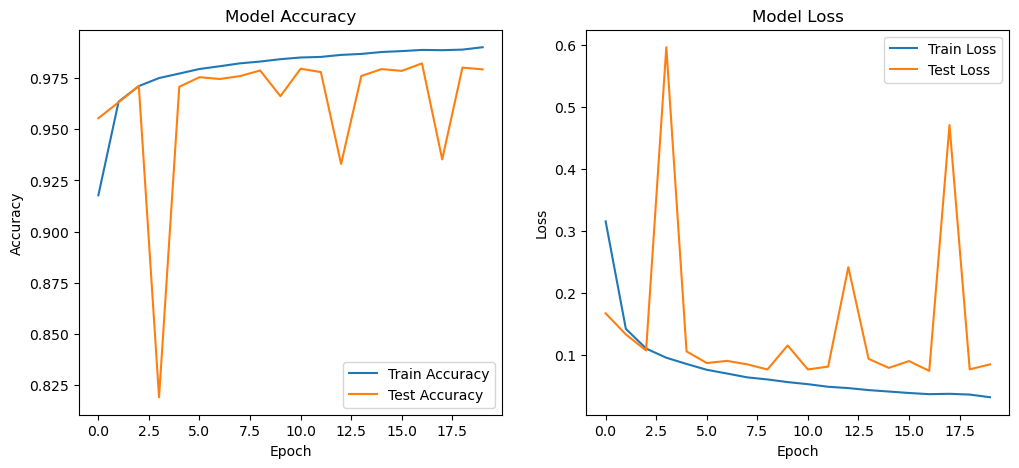

In [60]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


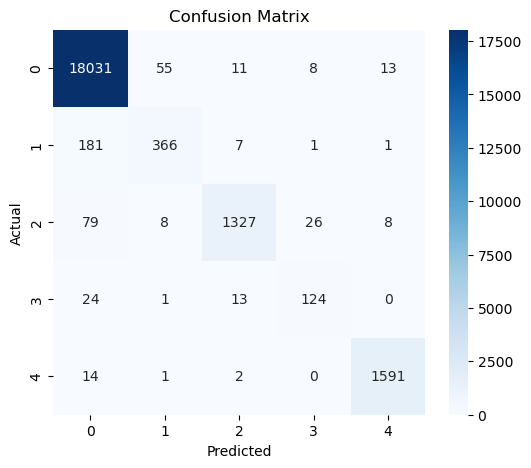

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.85      0.66      0.74       556
           2       0.98      0.92      0.95      1448
           3       0.78      0.77      0.77       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.86      0.89     21892
weighted avg       0.98      0.98      0.98     21892



In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true_classes, y_pred_classes))
